## Import the necessary library


In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Method to plot the progress of the agent's score

In [3]:
def plot_result(scores):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

## Validation method
The noise has to be deactivated before the validation. This method is being used to assess the performance of the agent after every episode of training

In [4]:
def validate(agent, max_t, train_mode=True):
    env_info = env.reset(train_mode=train_mode)[brain_name]
    states = env_info.vector_observations
    scores_one_episode = np.zeros(states.shape[0])
    for t in range(max_t):
        actions, _, _ = agent.act(states)                        # select an action (for each agent)
        env_info = env.step(np.clip(actions, -1, 1))[brain_name]   # send all actions to the environment
        next_states = env_info.vector_observations               # get next state (for each agent)
        rewards = env_info.rewards                               # get reward (for each agent)
        dones = env_info.local_done                              # see if episode finished
        scores_one_episode += env_info.rewards                   # update the score (for each agent)
        states = next_states                                     # roll over states to next time step
        if np.any(dones):                                        # exit loop if episode finished
            break
    return scores_one_episode

## Training method
The main loop of the training can be found here

In [5]:
def train(agent, n_episodes=500, max_t=500, train_mode=True):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]
        states = env_info.vector_observations
        scores_one_episode = np.zeros(states.shape[0])
        trajectories_states, trajectories_actions, trajectories_log_probs, trajectories_values, \
        trajectories_rewards, trajectories_next_states, trajectories_dones = [],[],[],[],[],[],[]
        
        for t in range(max_t):
            actions, log_probs, values = agent.act(states)
            env_info = env.step(np.clip(actions, -1, 1))[brain_name] # send all actions to the environment
            next_states = env_info.vector_observations               # get next state (for each agent)
            rewards = env_info.rewards                               # get reward (for each agent)
            dones = env_info.local_done                              # see if episode finished
            scores_one_episode += rewards
            trajectories_states.append(states)
            trajectories_actions.append(actions)
            trajectories_log_probs.append(log_probs)
            trajectories_values.append(values)
            trajectories_rewards.append(rewards)
            trajectories_next_states.append(next_states)
            trajectories_dones.append(dones)
            states = next_states                                     # roll over states to next time step
            if np.any(dones):                                        # exit loop if episode finished
                break
#                 env_info = env.reset(train_mode=train_mode)[brain_name]
#                 states = env_info.vector_observations 
  
        agent.learn(trajectories_states, trajectories_actions, trajectories_log_probs, trajectories_values, 
        trajectories_rewards, trajectories_next_states, trajectories_dones)
        score = np.average(scores_one_episode)
        scores.append(score)
        scores_window.append(score)
        mean_100 = np.mean(scores_window)
        print('Episode {}\tAverage Score: {:.3f}\tLast Score: {:.3f}\tMax Score: {:.3f}'.format(i_episode, 
                                                                                          mean_100, 
                                                                                          score,
                                                                                         np.max(scores_one_episode)))
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}\tMax Score: {:.3f}'.format(i_episode, mean_100, np.max(scores_window)))
            agent.save()
        if len(scores_window) >= 100 and np.mean(scores_window)>=max_t*30.0/950:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, mean_100))
            agent.save()
            break
    return scores

I:\MyDev\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.056	Last Score: 0.056	Max Score: 0.380
Episode 2	Average Score: 0.136	Last Score: 0.217	Max Score: 0.680
Episode 3	Average Score: 0.202	Last Score: 0.332	Max Score: 0.950
Episode 4	Average Score: 0.293	Last Score: 0.567	Max Score: 1.700
Episode 5	Average Score: 0.416	Last Score: 0.909	Max Score: 2.050
Episode 6	Average Score: 0.556	Last Score: 1.257	Max Score: 2.560
Episode 7	Average Score: 0.648	Last Score: 1.198	Max Score: 2.820
Episode 8	Average Score: 0.811	Last Score: 1.955	Max Score: 3.660
Episode 9	Average Score: 0.943	Last Score: 1.997	Max Score: 3.280
Episode 10	Average Score: 1.120	Last Score: 2.710	Max Score: 4.650
Episode 11	Average Score: 1.288	Last Score: 2.964	Max Score: 5.890
Episode 12	Average Score: 1.441	Last Score: 3.123	Max Score: 5.460
Episode 13	Average Score: 1.595	Last Score: 3.450	Max Score: 5.540
Episode 14	Average Score: 1.756	Last Score: 3.842	Max Score: 6.780
Episode 15	Average Score: 1.922	Last Score: 4.257	Max Score: 6.980
Epis

Episode 119	Average Score: 28.065	Last Score: 38.214	Max Score: 39.660
Episode 120	Average Score: 28.382	Last Score: 37.964	Max Score: 39.610
Episode 121	Average Score: 28.704	Last Score: 38.293	Max Score: 39.620
Episode 122	Average Score: 29.018	Last Score: 38.192	Max Score: 39.530
Episode 123	Average Score: 29.320	Last Score: 38.319	Max Score: 39.610
Episode 124	Average Score: 29.620	Last Score: 38.065	Max Score: 39.570
Episode 125	Average Score: 29.922	Last Score: 37.964	Max Score: 39.660
Episode 126	Average Score: 30.223	Last Score: 38.035	Max Score: 39.520
Episode 127	Average Score: 30.518	Last Score: 38.595	Max Score: 39.610
Episode 128	Average Score: 30.802	Last Score: 38.616	Max Score: 39.540
Episode 129	Average Score: 31.092	Last Score: 38.592	Max Score: 39.640
Episode 130	Average Score: 31.375	Last Score: 38.449	Max Score: 39.580
Episode 131	Average Score: 31.650	Last Score: 38.384	Max Score: 39.600
Episode 132	Average Score: 31.940	Last Score: 38.704	Max Score: 39.570

Envir

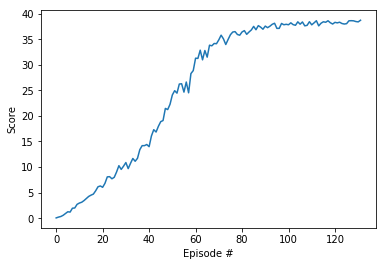

In [6]:
from agents.ppo import PPO
from agents.model_ppo import Gaussian
import random
import torch.nn.functional as F

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
states = env_info.vector_observations
action_size = brain.vector_action_space_size
network = Gaussian(states.shape[1], action_size, activation=F.leaky_relu).to(device)
agent = PPO(network, device,
                 LR=3e-4,
                 GRADIENT_CLIP=5, 
                 EPOCHS=10, 
                 BATCH_SIZE=256,
                GAMMA=0.99,
                GAE_TAU=0.95,
                CLIP_EPSILON=0.2)
scores = train(agent, n_episodes=6000, max_t=1010, train_mode=True)
plot_result(scores)

## View the trained agent
Use the cell below to load and view a trained agent

In [12]:
agent.load("ppo.pth")
scores = validate(agent, 1000, False)
print(np.mean(scores))

35.897999197617175
